In [3]:
!pip install pandas numpy matplotlib seaborn scikit-learn

In [7]:
import os
print(os.listdir('/kaggle/input'))

['titanic']


In [9]:
import os
print(os.listdir('/kaggle/input'))

['titanic']


In [10]:
print(os.listdir('/kaggle/input/titanic'))

['Titanic-Dataset.csv']


In [11]:
import pandas as pd
file_path = '/kaggle/input/titanic/Titanic-Dataset.csv'
df = pd.read_csv(file_path)
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
import pandas as pd
file_path = '/kaggle/input/titanic/Titanic-Dataset.csv'
df = pd.read_csv(file_path)
print(df.info())
print(df.describe())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

In [15]:
df.fillna(df.mean(numeric_only=True), inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)


In [16]:
from sklearn.preprocessing import LabelEncoder
categorical_cols = df.select_dtypes(include=['object']).columns
encoder = LabelEncoder()
df[categorical_cols] = df[categorical_cols].apply(lambda col: encoder.fit_transform(col))


In [17]:
print(df.head())


   PassengerId  Survived  Pclass  Name  Sex   Age  SibSp  Parch  Ticket  \
0            1         0       3   108    1  22.0      1      0     523   
1            2         1       1   190    0  38.0      1      0     596   
2            3         1       3   353    0  26.0      0      0     669   
3            4         1       1   272    0  35.0      1      0      49   
4            5         0       3    15    1  35.0      0      0     472   

      Fare  Cabin  Embarked  
0   7.2500     47         2  
1  71.2833     81         0  
2   7.9250     47         2  
3  53.1000     55         2  
4   8.0500     47         2  


In [18]:
print(df.select_dtypes(include=['object']).columns)


Index([], dtype='object')


In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[df.select_dtypes(include=['int64', 'float64']).columns] = scaler.fit_transform(df[df.select_dtypes(include=['int64', 'float64']).columns])


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [20]:
import pandas as pd
file_path = "/kaggle/input/titanic/Titanic-Dataset.csv"  # Adjust if needed
df = pd.read_csv(file_path)
print("Dataset Info:")
print(df.info())  # Data types & missing values
print("\nFirst few rows:")
print(df.head())  # Show dataset preview


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

First few rows:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0    

In [21]:
print("\nMissing values before handling:")
print(df.isnull().sum())
df.fillna(df.mean(numeric_only=True), inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)
print("\nMissing values after handling:")
print(df.isnull().sum())
print("\nDataset after handling missing values:")
print(df.head())



Missing values before handling:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing values after handling:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Dataset after handling missing values:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0

In [22]:
from sklearn.preprocessing import LabelEncoder
categorical_cols = df.select_dtypes(include=["object"]).columns
print("\nCategorical columns:", categorical_cols)
encoder = LabelEncoder()
df[categorical_cols] = df[categorical_cols].apply(lambda col: encoder.fit_transform(col))
print("\nDataset after encoding categorical features:")
print(df.head())



Categorical columns: Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

Dataset after encoding categorical features:
   PassengerId  Survived  Pclass  Name  Sex   Age  SibSp  Parch  Ticket  \
0            1         0       3   108    1  22.0      1      0     523   
1            2         1       1   190    0  38.0      1      0     596   
2            3         1       3   353    0  26.0      0      0     669   
3            4         1       1   272    0  35.0      1      0      49   
4            5         0       3    15    1  35.0      0      0     472   

      Fare  Cabin  Embarked  
0   7.2500     47         2  
1  71.2833     81         0  
2   7.9250     47         2  
3  53.1000     55         2  
4   8.0500     47         2  


In [23]:
from sklearn.preprocessing import StandardScaler
numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
print("\nDataset after normalization:")
print(df.head())



Dataset after normalization:
   PassengerId  Survived    Pclass      Name       Sex       Age     SibSp  \
0    -1.730108 -0.789272  0.827377 -1.310217  0.737695 -0.592481  0.432793   
1    -1.726220  1.266990 -1.566107 -0.991410 -1.355574  0.638789  0.432793   
2    -1.722332  1.266990  0.827377 -0.357685 -1.355574 -0.284663 -0.474545   
3    -1.718444  1.266990 -1.566107 -0.672604 -1.355574  0.407926  0.432793   
4    -1.714556 -0.789272  0.827377 -1.671790  0.737695  0.407926 -0.474545   

      Parch    Ticket      Fare     Cabin  Embarked  
0 -0.473674  0.918966 -0.502445 -0.281881  0.585954  
1 -0.473674  1.282625  0.786845  1.161545 -1.942303  
2 -0.473674  1.646283 -0.488854 -0.281881  0.585954  
3 -0.473674 -1.442322  0.420730  0.057748  0.585954  
4 -0.473674  0.664904 -0.486337 -0.281881  0.585954  


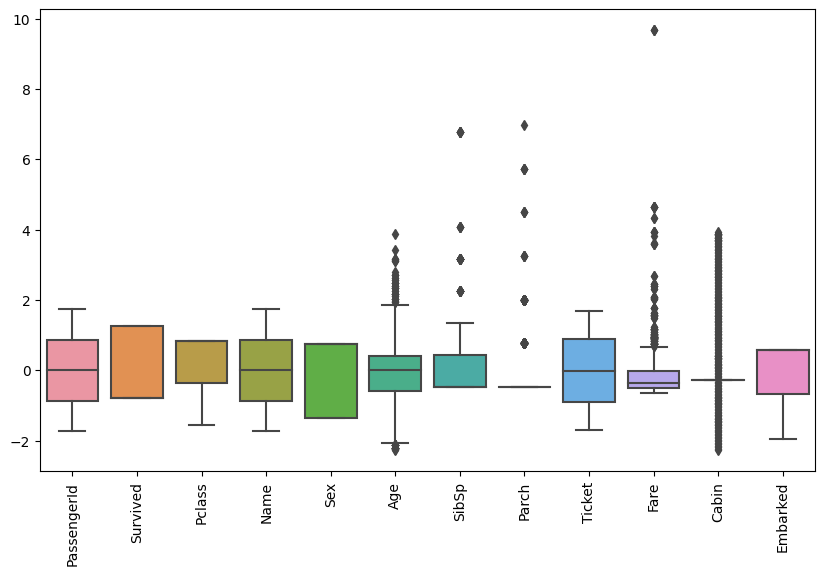


Dataset after removing outliers:
   PassengerId  Survived    Pclass      Name       Sex       Age     SibSp  \
0    -1.730108 -0.789272  0.827377 -1.310217  0.737695 -0.592481  0.432793   
2    -1.722332  1.266990  0.827377 -0.357685 -1.355574 -0.284663 -0.474545   
4    -1.714556 -0.789272  0.827377 -1.671790  0.737695  0.407926 -0.474545   
5    -1.710669 -0.789272  0.827377  0.423779  0.737695  0.000000 -0.474545   
9    -1.695117  1.266990 -0.369365  0.509313 -1.355574 -1.208115  0.432793   

      Parch    Ticket      Fare     Cabin  Embarked  
0 -0.473674  0.918966 -0.502445 -0.281881  0.585954  
2 -0.473674  1.646283 -0.488854 -0.281881  0.585954  
4 -0.473674  0.664904 -0.486337 -0.281881  0.585954  
5 -0.473674 -0.316475 -0.478116 -0.281881 -0.678175  
9 -0.473674 -1.028847 -0.042956 -0.281881 -1.942303  


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
print("\nDataset after removing outliers:")
print(df.head())
